In [4]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import EngFormatter, StrMethodFormatter
import matplotlib.ticker as ticker
from fredapi import Fred
fred = Fred(api_key='2ed451d97ec839270c0c1ae9d68367e4')
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})
import pypandoc

# Part 1: Extracting series into a table and exporting to PDF

Real Gross Domestic Product
Personal Income
US Unemployment
Labor Force Participation Rate

In [5]:
fp.api_key = '2ed451d97ec839270c0c1ae9d68367e4'

In [6]:
GDP= fp.series('GDPC1')

In [7]:
PI = fp.series('PI')

In [8]:
UE = fp.series('UNRATE')

In [9]:
LPR = fp.series('CIVPART')

In [10]:
print(GDP.date_range)
print(PI.date_range)
print(UE.date_range)
print(LPR.date_range)

Range: 1947-01-01 to 2021-01-01
Range: 1946-01-01 to 2021-05-01
Range: 1948-01-01 to 2021-06-01
Range: 1948-01-01 to 2021-06-01


In [11]:
GDP.data

date
1947-01-01     2033.061
1947-04-01     2027.639
1947-07-01     2023.452
1947-10-01     2055.103
1948-01-01     2086.017
                ...    
2020-01-01    19010.848
2020-04-01    17302.511
2020-07-01    18596.521
2020-10-01    18794.426
2021-01-01    19086.375
Name: value, Length: 297, dtype: float64

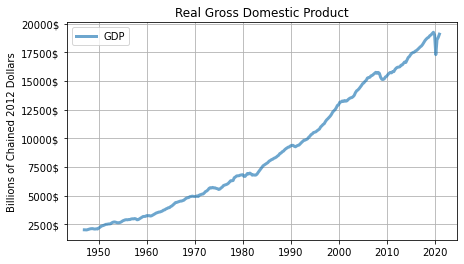

In [12]:
figGDP = plt.figure(figsize=(7,4))
val= GDP.data[1]
ax = figGDP.add_subplot(1,1,1)
ax.plot(GDP.data,'-',lw=3,alpha = 0.65,label='GDP')
ax.legend(loc='upper left')
ax.set_title(GDP.title)
ax.set_ylabel(GDP.units)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d$"))
ax.grid()

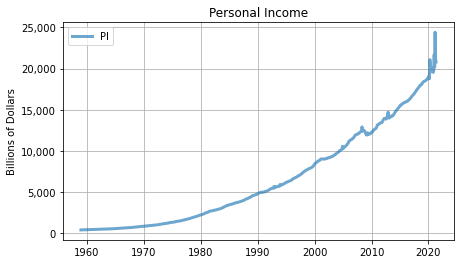

In [13]:
figPI = plt.figure(figsize=(7,4))
ax = figPI.add_subplot(1,1,1)
ax.plot(PI.data,'-',lw=3,alpha = 0.65,label='PI')
ax.legend(loc='upper left')
ax.set_title(PI.title)
ax.set_ylabel(PI.units)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.grid()

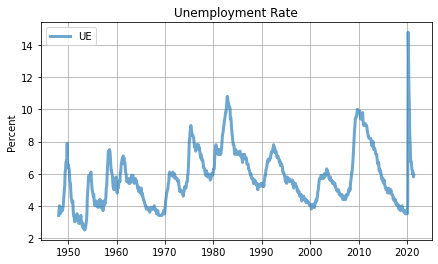

In [14]:
figUE = plt.figure(figsize=(7,4))
ax = figUE.add_subplot(1,1,1)
ax.plot(UE.data,'-',lw=3,alpha = 0.65,label='UE')
ax.legend(loc='upper left')
ax.set_title(UE.title)
ax.set_ylabel(UE.units)
ax.grid()

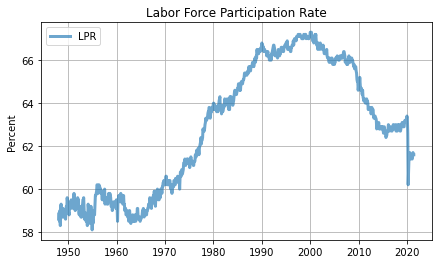

In [15]:
figLPR = plt.figure(figsize=(7,4))
ax = figLPR.add_subplot(1,1,1)
ax.plot(LPR.data,'-',lw=3,alpha = 0.65,label='LPR')
ax.legend(loc='upper left')
ax.set_title(LPR.title)
ax.set_ylabel(LPR.units)
ax.grid()

In [16]:
pp = PdfPages('Plots.pdf')
pp.savefig(figGDP)
pp.savefig(figPI)
pp.savefig(figUE)
pp.savefig(figLPR)
pp.close()

# Part 2:  Extacting data series on a state level basis (will use real GDP)

In [17]:
GDP= fp.series('GDPCA')

Extracted state level GDP data using R (file: extracting_state_data.R)

In [18]:
state_df= pd.read_csv('state_level_Real_GDP.csv')

In [19]:
state_df.head()

Unnamed: 0  symbol        date     price state
0           1  ALRGSP  1997-01-01  144457.3    AL
1           2  ALRGSP  1998-01-01  149613.2    AL
2           3  ALRGSP  1999-01-01  155171.9    AL
3           4  ALRGSP  2000-01-01  157697.7    AL
4           5  ALRGSP  2001-01-01  157137.9    AL

In [20]:
state_df = state_df.drop(['Unnamed: 0', 'symbol'], axis=1)

In [21]:
state_df['date']= pd.to_datetime(state_df['date'])

In [22]:
GDP_df = pd.DataFrame(GDP.data)

In [23]:
GDP_df.reset_index(inplace=True)

In [24]:
GDP_filter = GDP_df[GDP_df['date'] > '1996-01-01T00:00:00.000000000']

In [25]:
GDP_filter.head()

date      value
68 1997-01-01  11521.938
69 1998-01-01  12038.283
70 1999-01-01  12610.491
71 2000-01-01  13130.987
72 2001-01-01  13262.079

In [26]:
GDP_filter1 = GDP_filter.set_index('date')

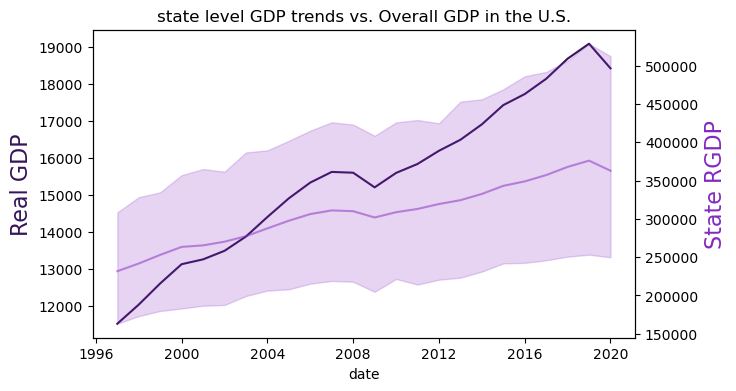

In [27]:
matplot.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(7,4))
sns.lineplot(data=GDP_filter, x='date', y='value', color="#351459", ax=ax1)
#plt.ylim(0,.07)
ax1.set_ylabel('Real GDP', fontsize=16, color="#351459")
ax2 = ax1.twinx()
sns.lineplot(data=state_df, x='date', y='price', alpha=0.5, color='#832ac0', ax=ax2)
ax2.set_ylabel('State RGDP', fontsize=16, color='#832ac0')
plt.title('state level GDP trends vs. Overall GDP in the U.S.')
#plt.savefig('/Users/jacquelinebarrett/Documents/Gong/Data/Output/PercentageSuccessfulByDoW.png')
plt.show()


In [28]:
ddd = state_df.pivot(index = 'date', columns = 'state', values = 'price')
ddd.head()

state            AK        AL       AR        AZ         CA        CO  \
date                                                                    
1997-01-01  42339.2  144457.3  82760.4  168372.2  1379722.1  184492.1   
1998-01-01  41238.4  149613.2  84791.3  182983.5  1470543.0  201034.9   
1999-01-01  40788.2  155171.9  89339.5  198002.1  1583231.3  216139.3   
2000-01-01  39566.8  157697.7  90224.2  207774.8  1709490.6  232832.1   
2001-01-01  41019.8  157137.9  90081.0  212648.3  1707064.7  236310.6   

state             CT       DE        FL        GA  ...       SD        TN  \
date                                               ...                      
1997-01-01  190667.7  45802.8  560807.2  329106.6  ...  25038.2  210740.0   
1998-01-01  196175.1  50115.1  588868.1  353292.8  ...  26511.1  223901.3   
1999-01-01  202264.4  53942.2  614442.1  378237.4  ...  27510.9  230731.6   
2000-01-01  216293.1  56265.5  641249.0  391210.2  ...  29399.2  233697.5   
2001-01-01  219932.4  59013.7  658349.1  395041.3  ...  29631.8  232785.7   

state              TX       UT        VA       VT        WA        WI  \
date                                                                    
1997-01-01   872557.4  80662.0  298715.9  20072.4  271457.1  209525.4   
1998-01-01   927742.2  85713.8  315005.0  20705.4  288446.3  217403.2   
1999-01-01   963961.7  89291.6  331118.0  21845.8  309918.3  226417.0   
2000-01-01   998148.9  92626.6  346997.3  23022.8  312645.6  233212.3   
2001-01-01  1021693.4  94102.6  358918.3  23710.2  305511.9  236189.2   

state            WV       WY  
date                          
1997-01-01  59183.2  25205.7  
1998-01-01  60109.6  25756.1  
1999-01-01  62110.3  26819.5  
2000-01-01  62001.4  27676.7  
2001-01-01  62016.6  29278.0  

[5 rows x 50 columns]

In [29]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

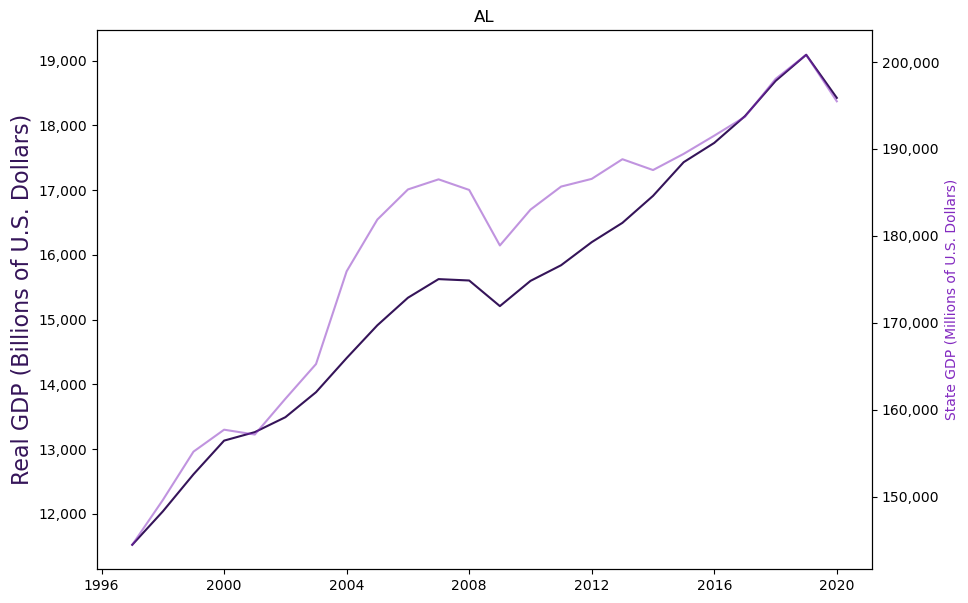

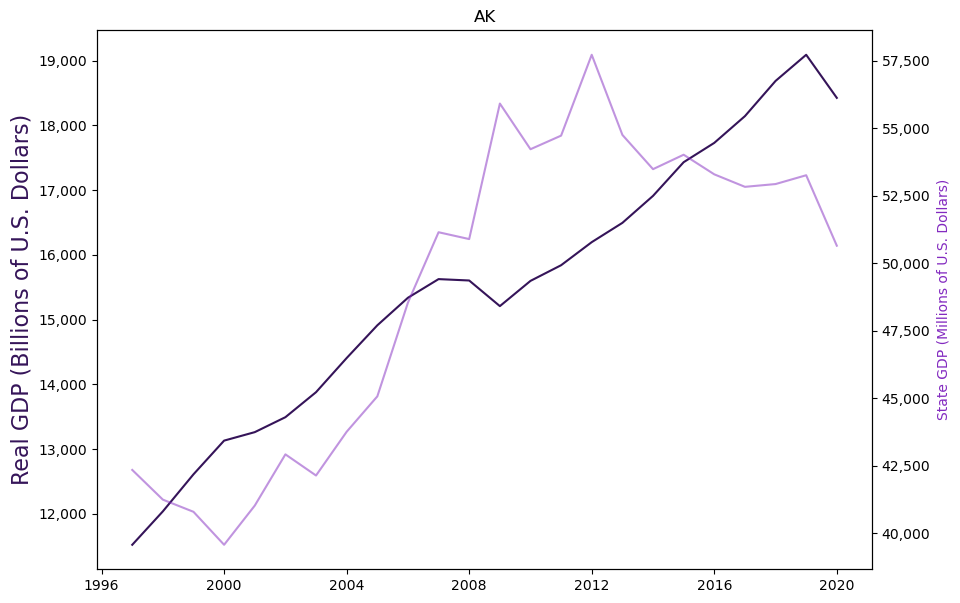

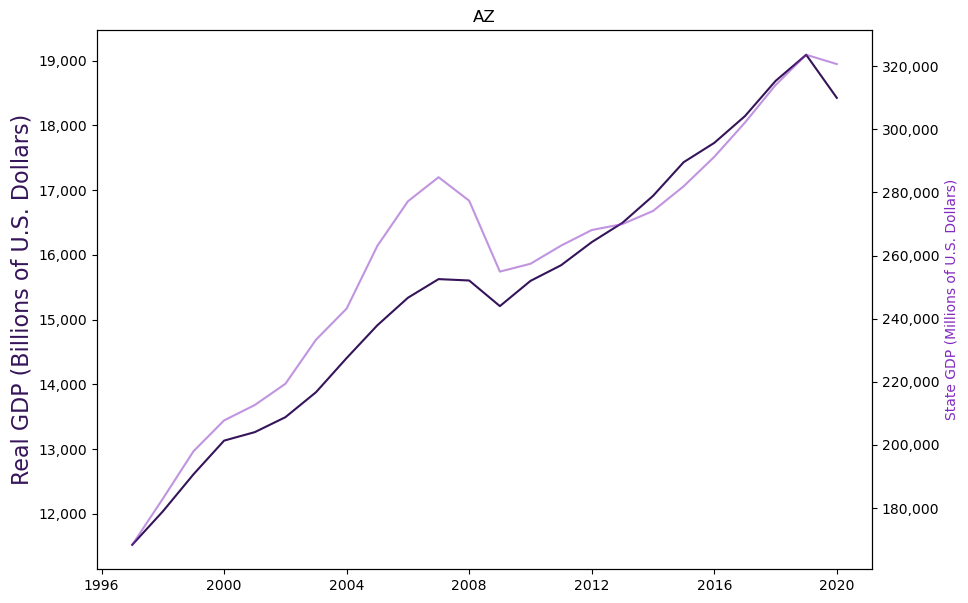

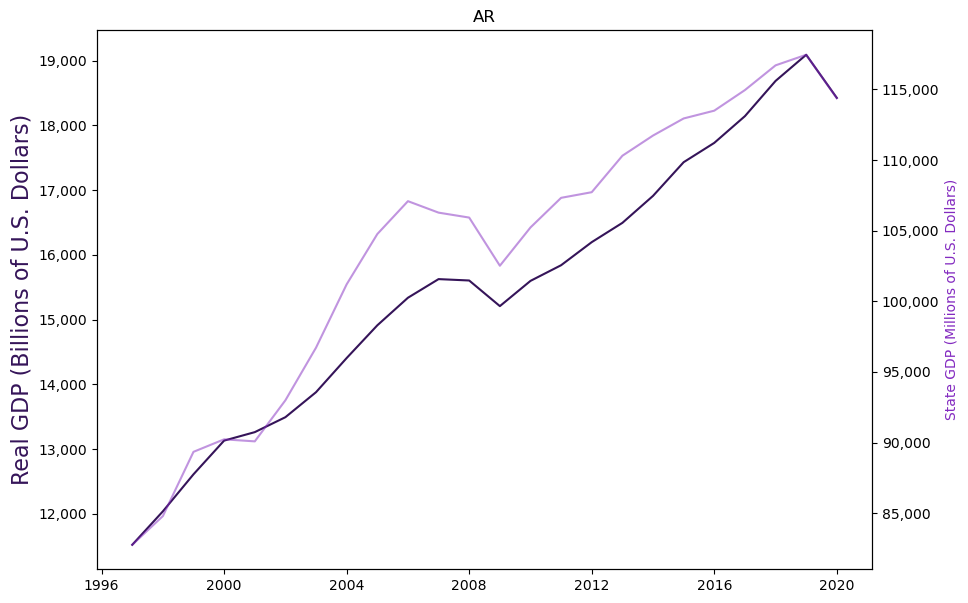

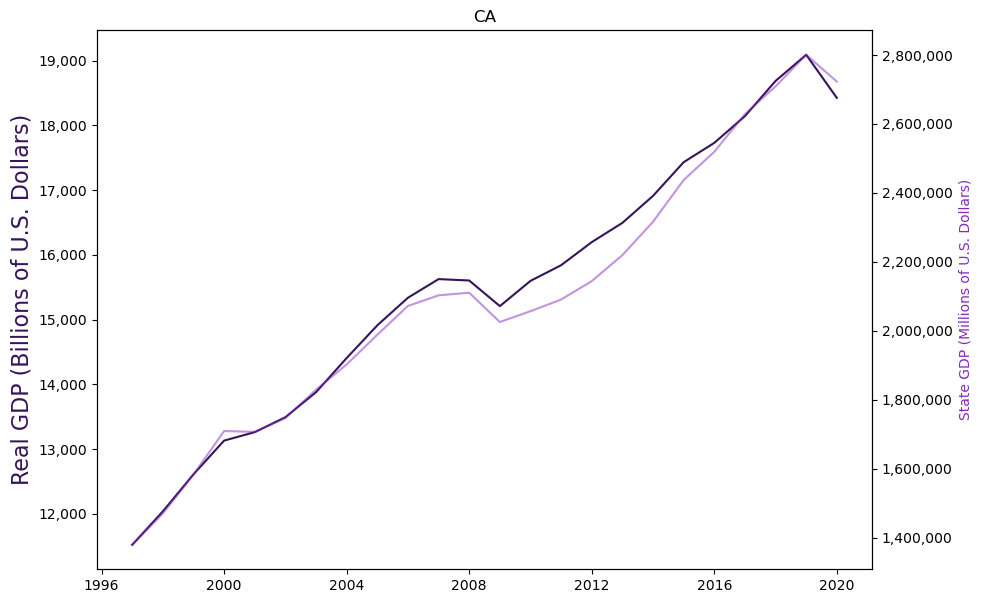

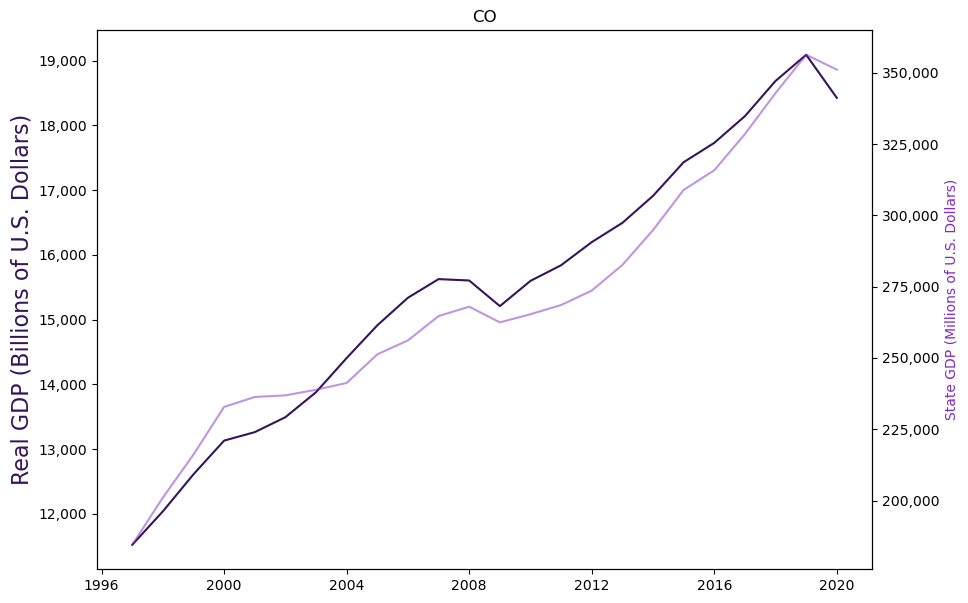

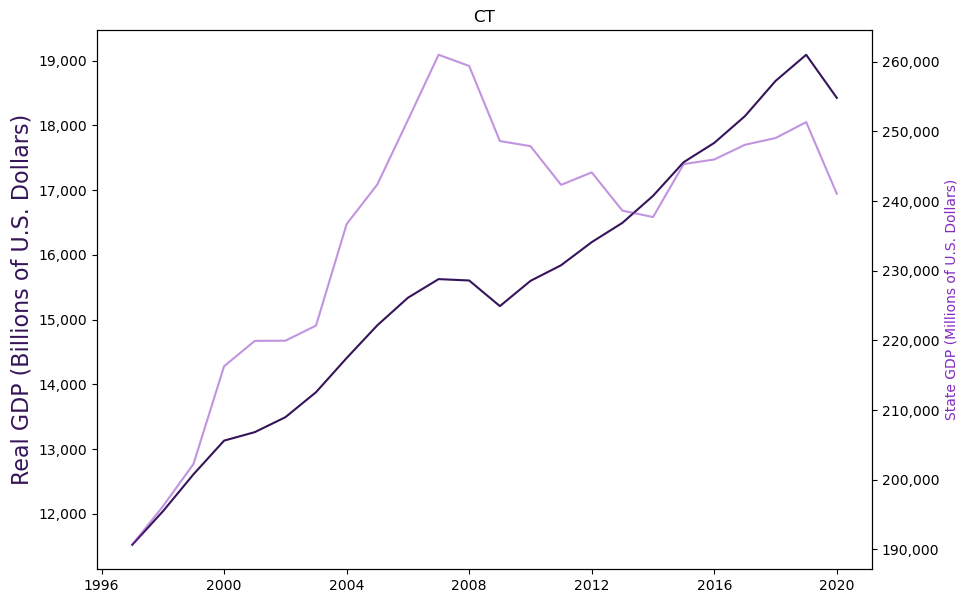

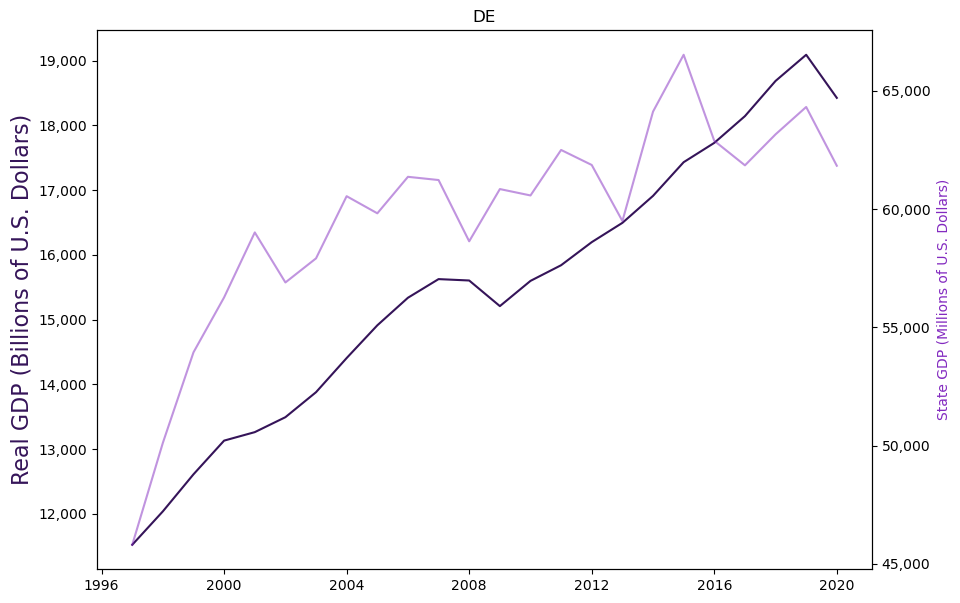

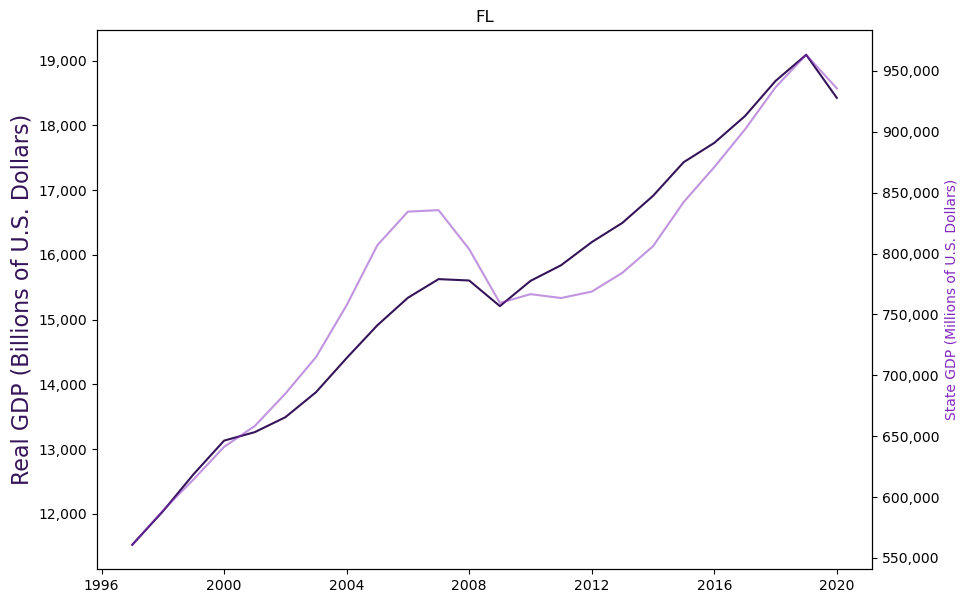

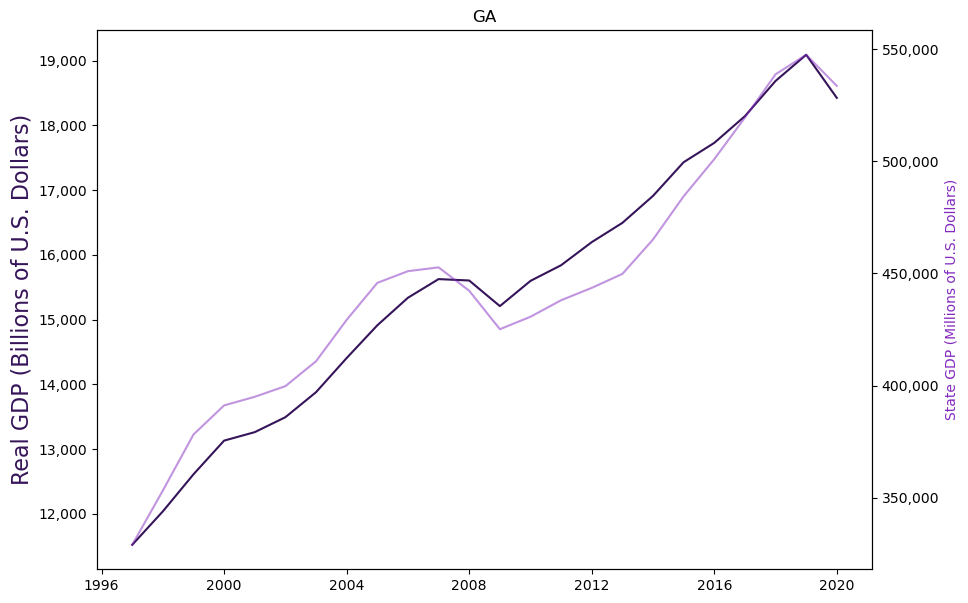

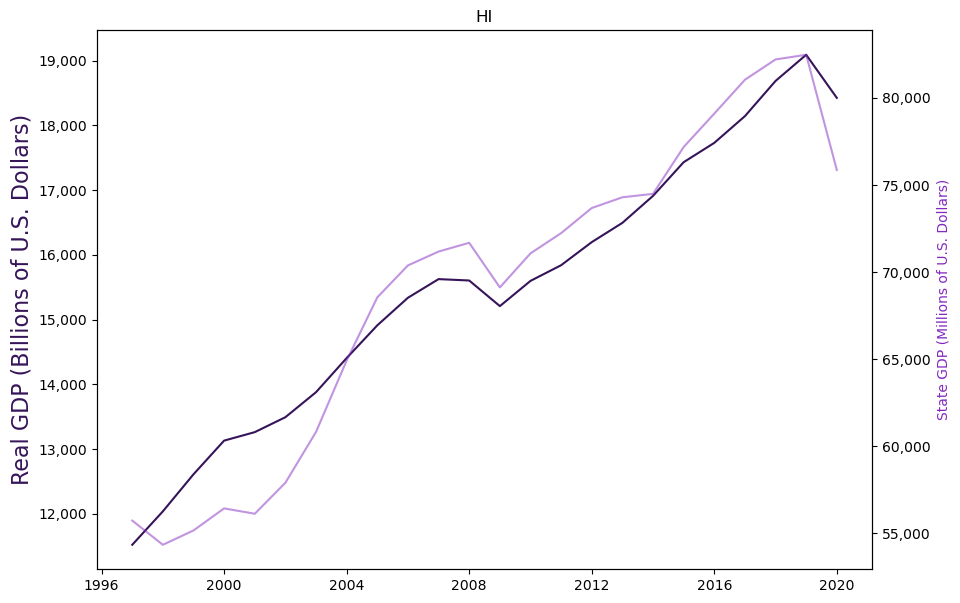

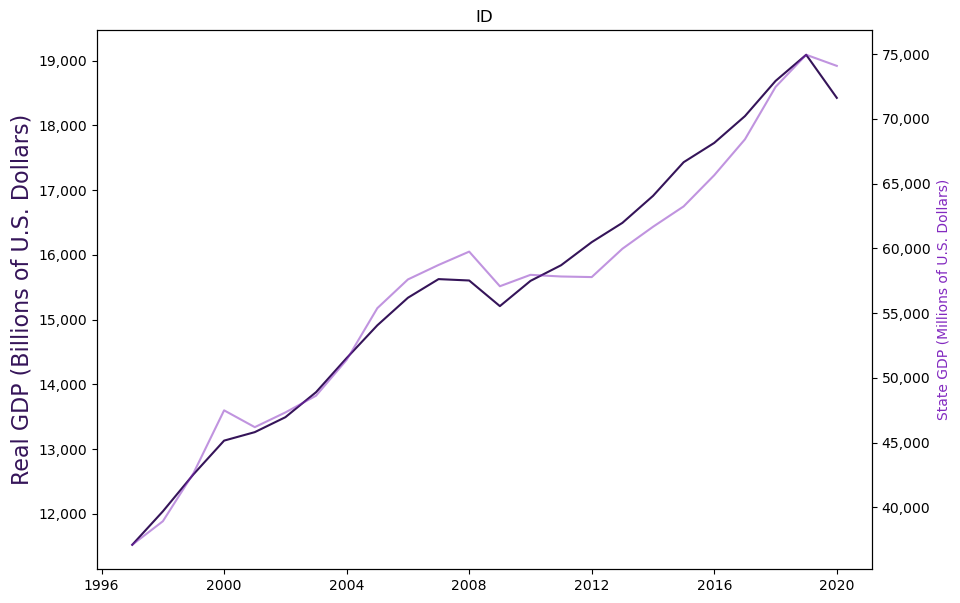

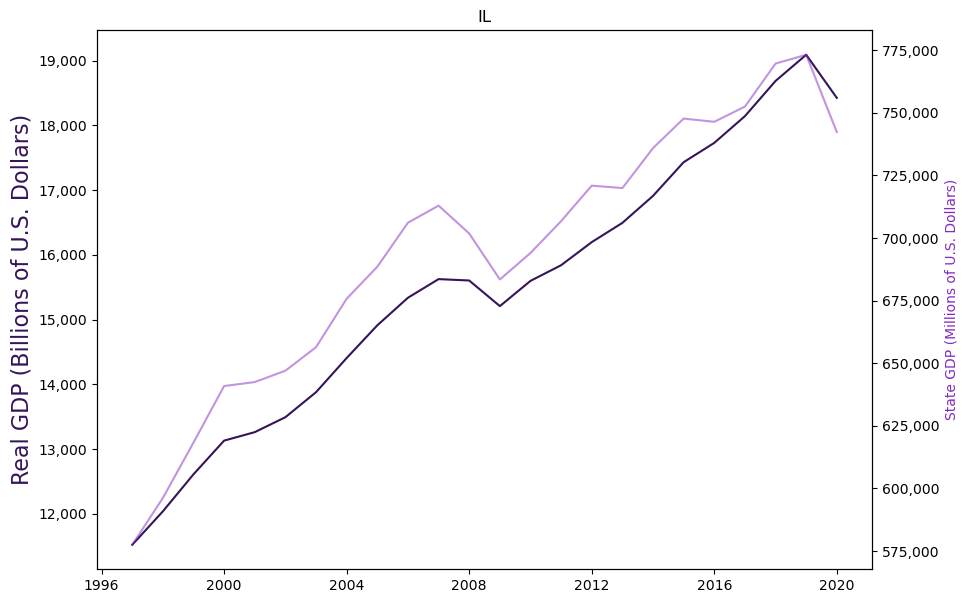

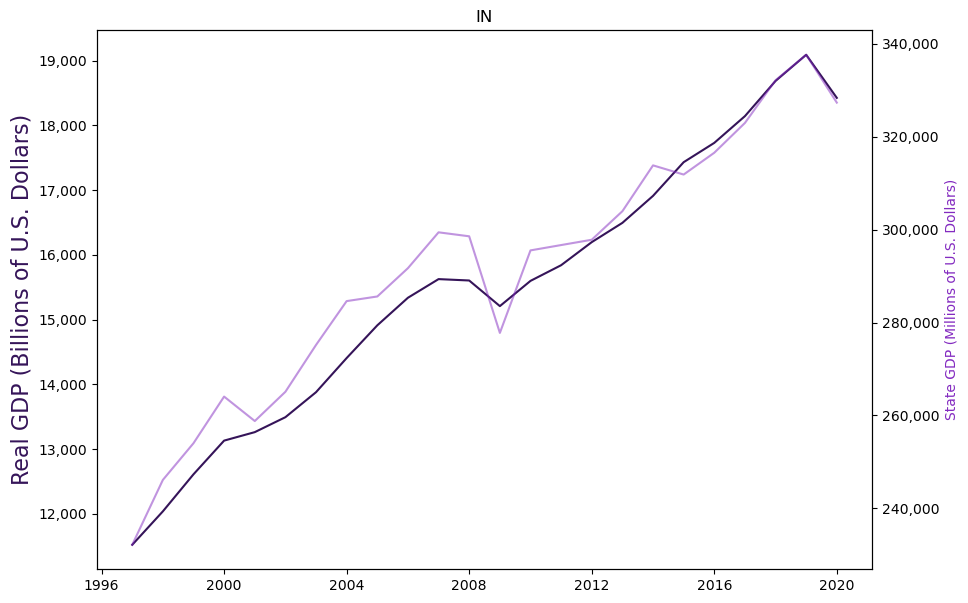

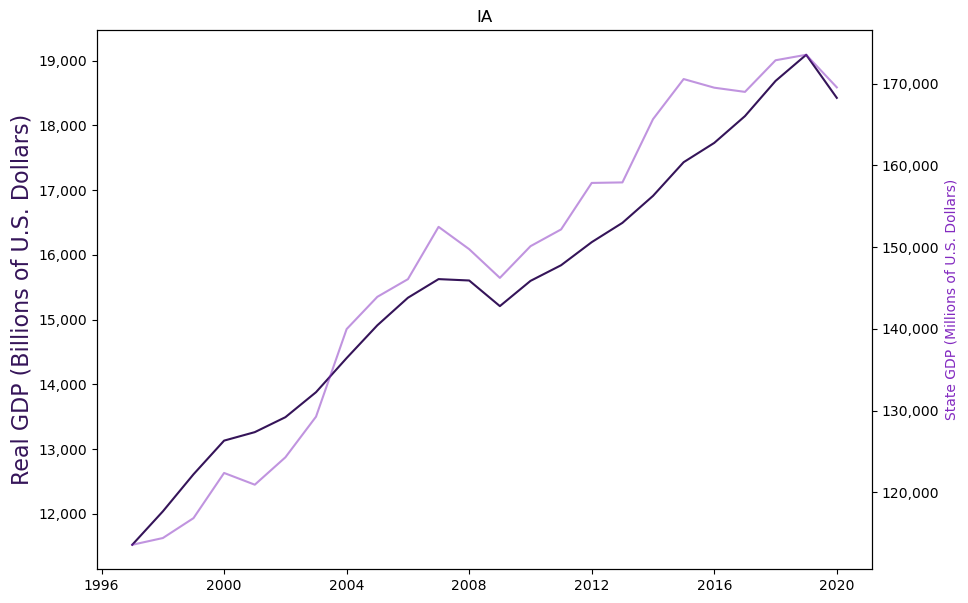

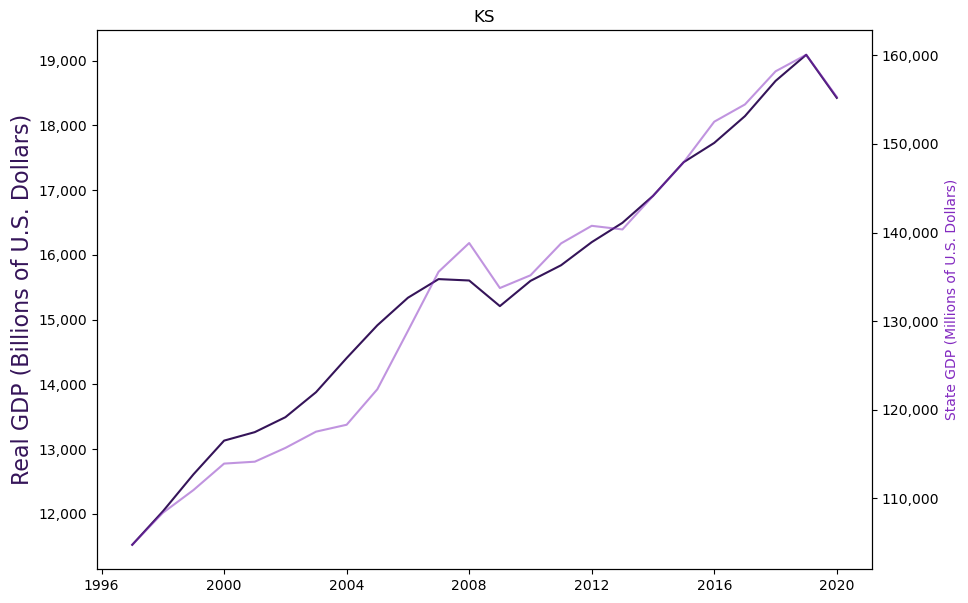

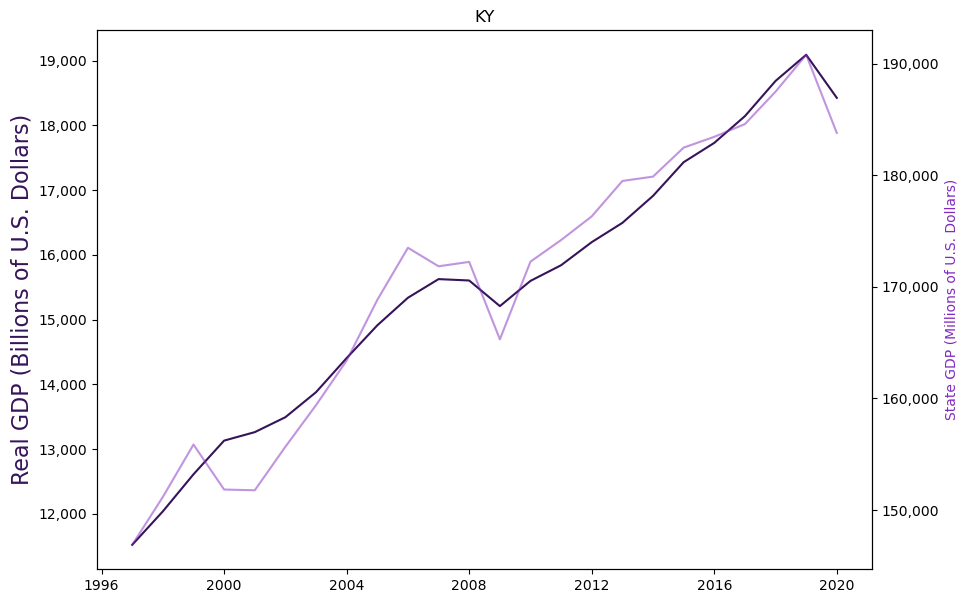

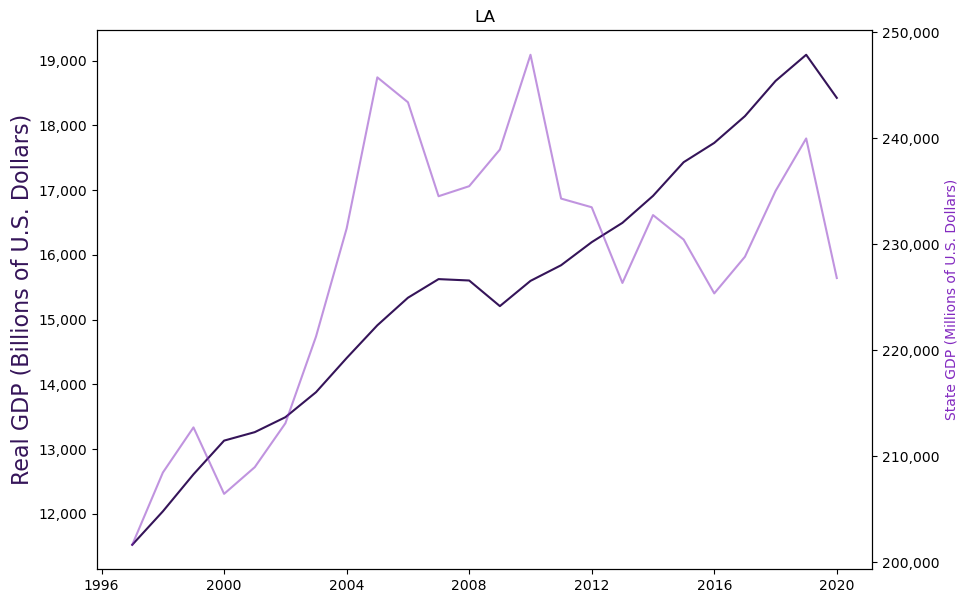

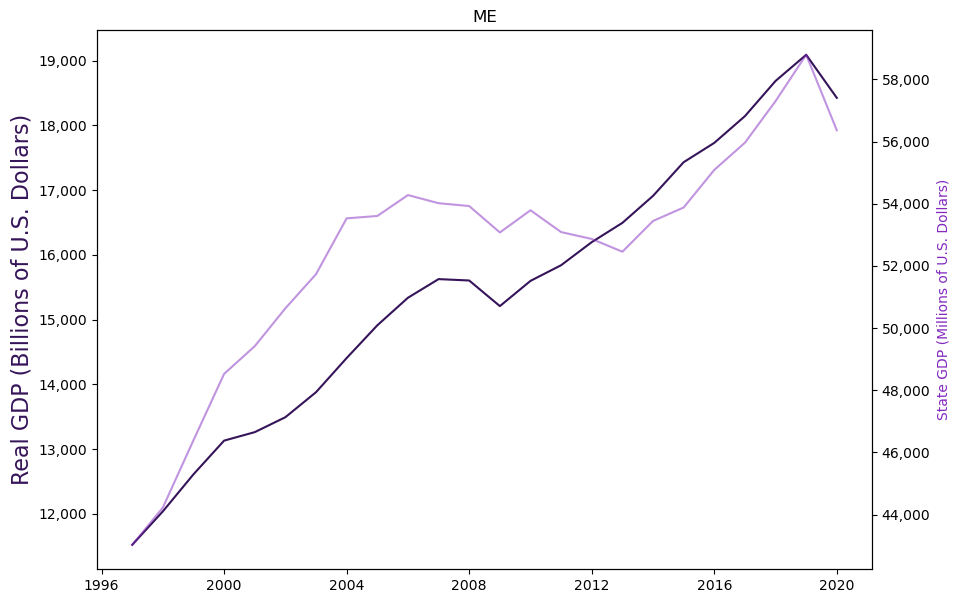

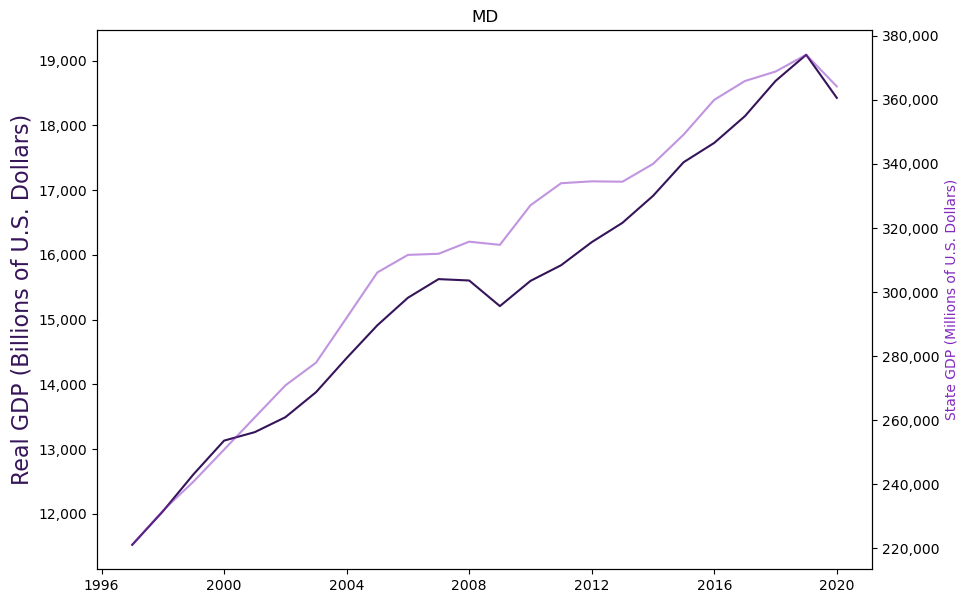

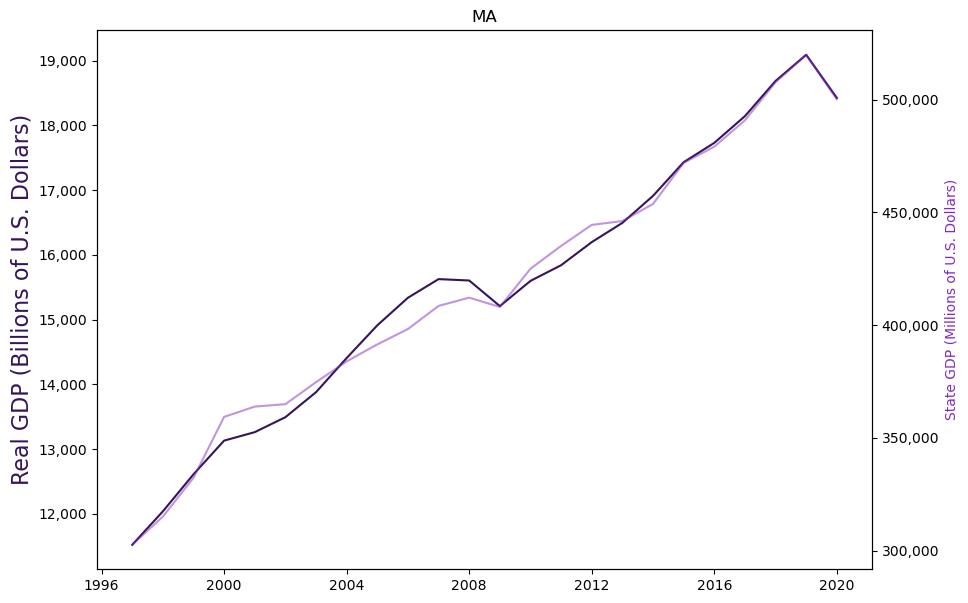

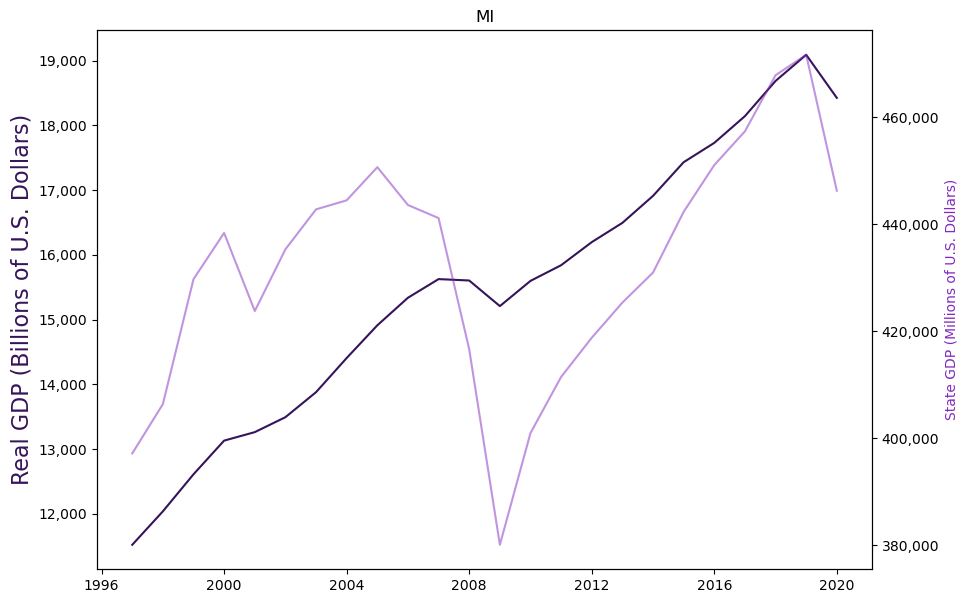

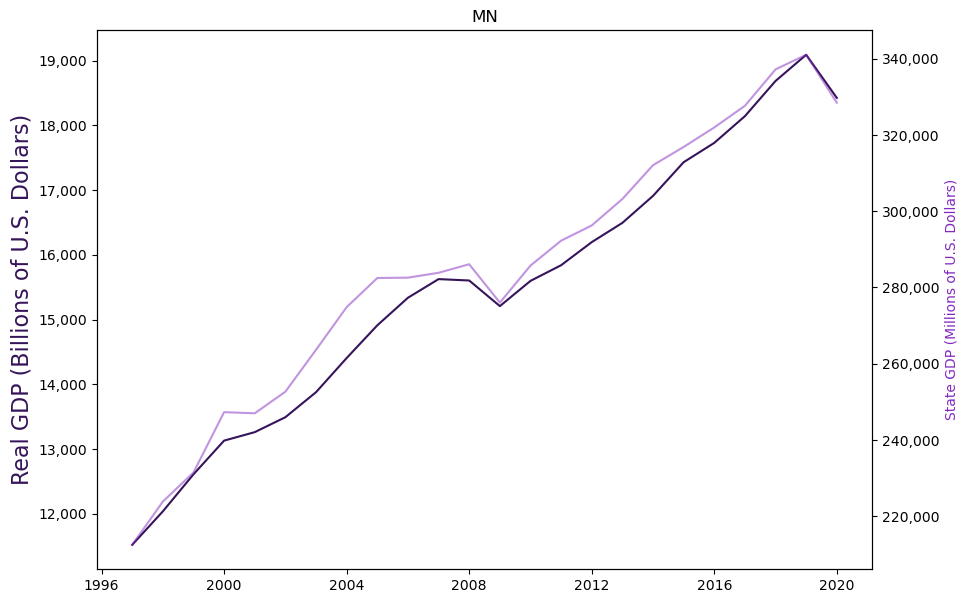

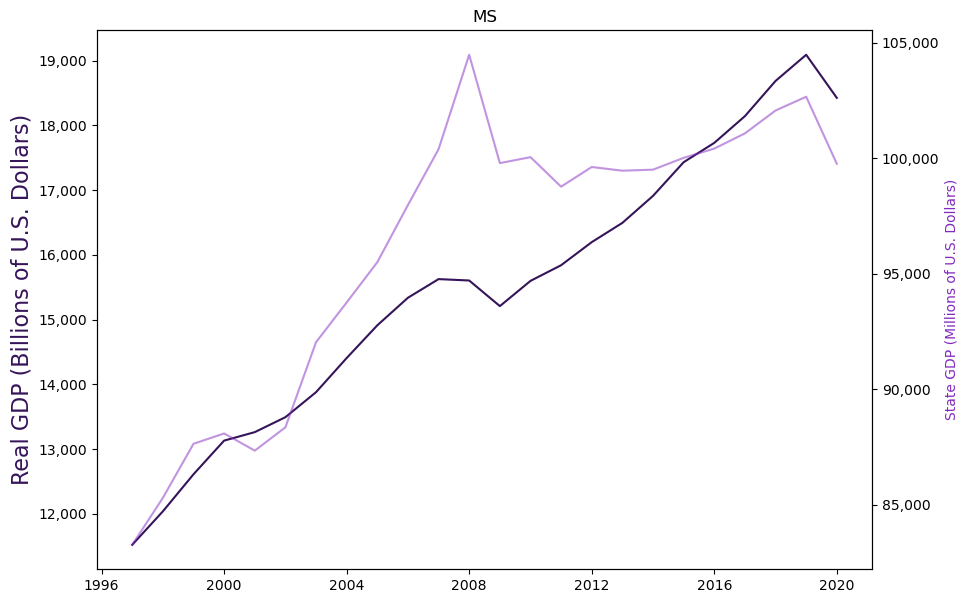

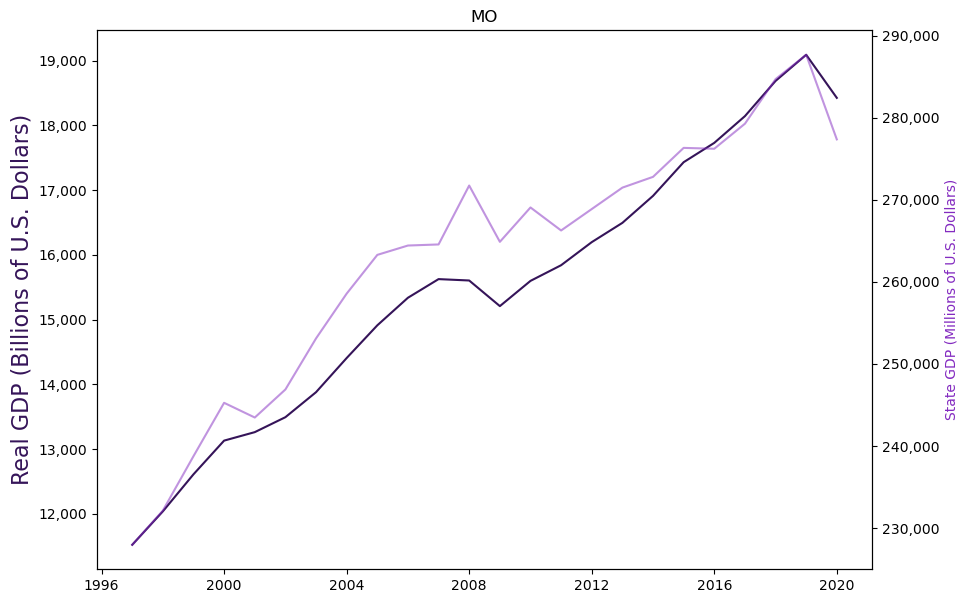

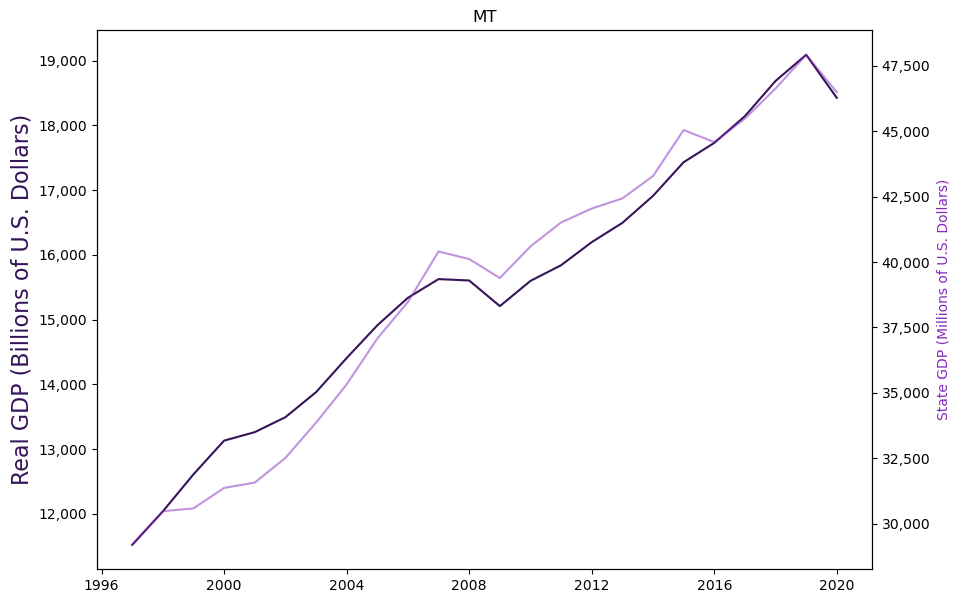

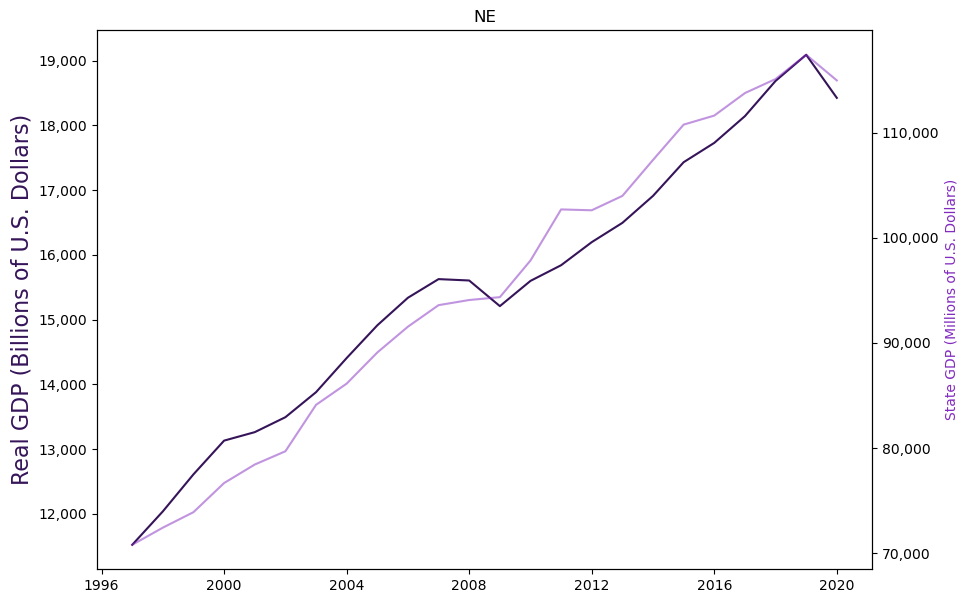

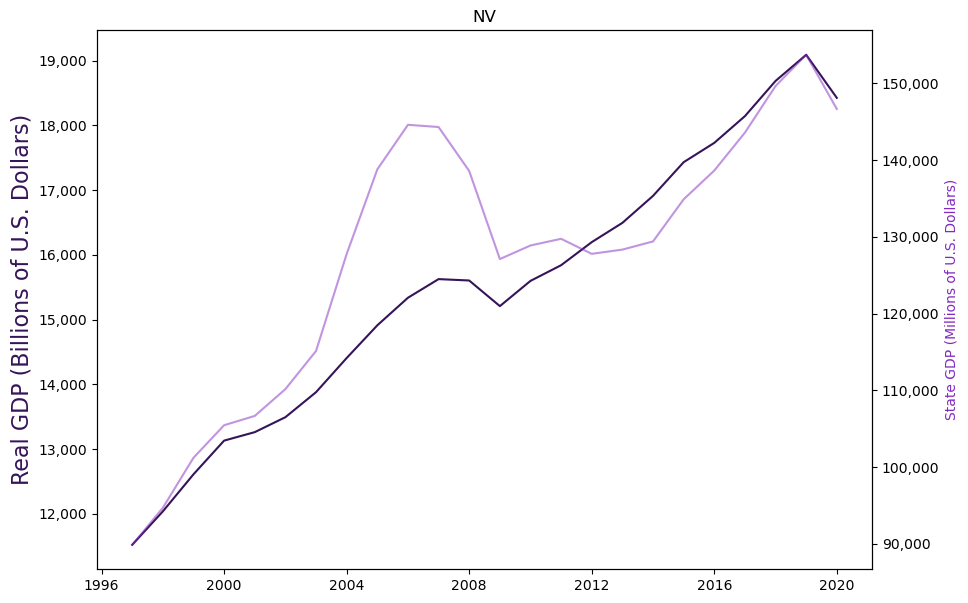

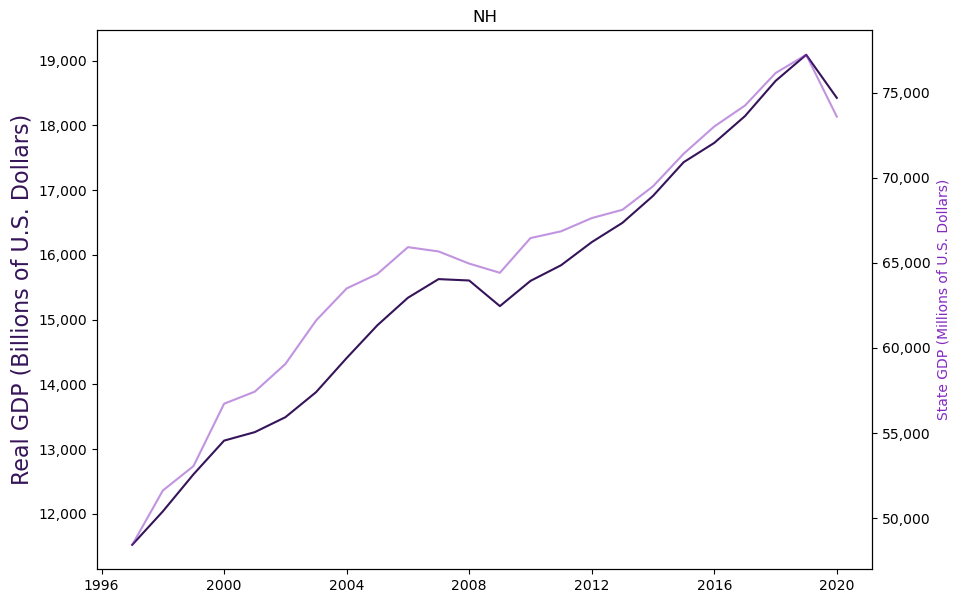

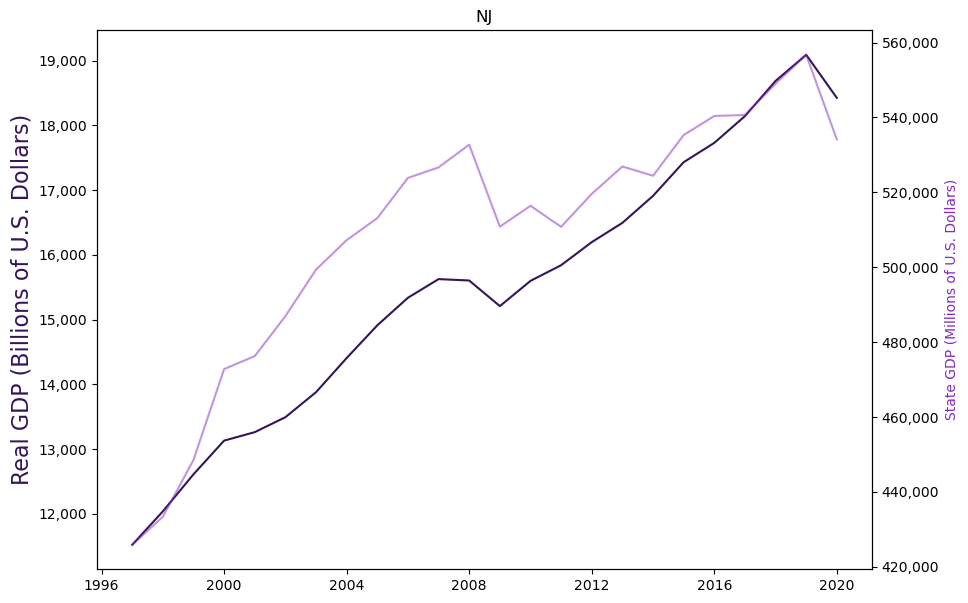

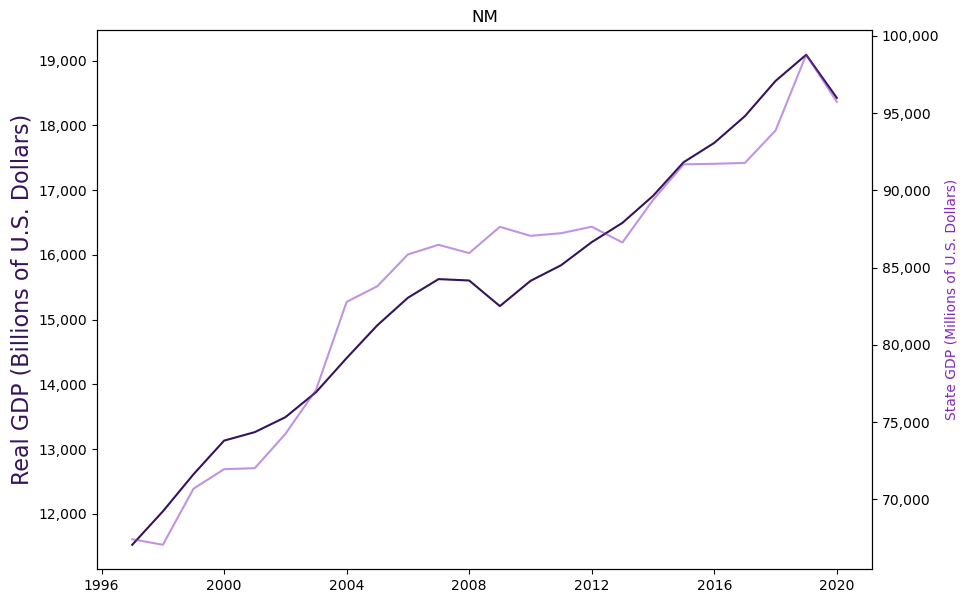

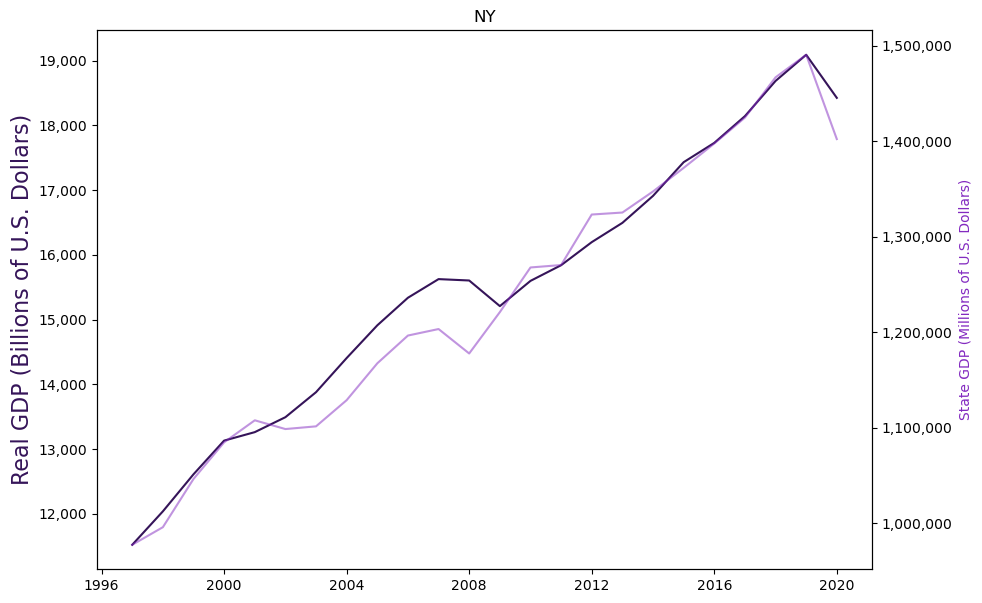

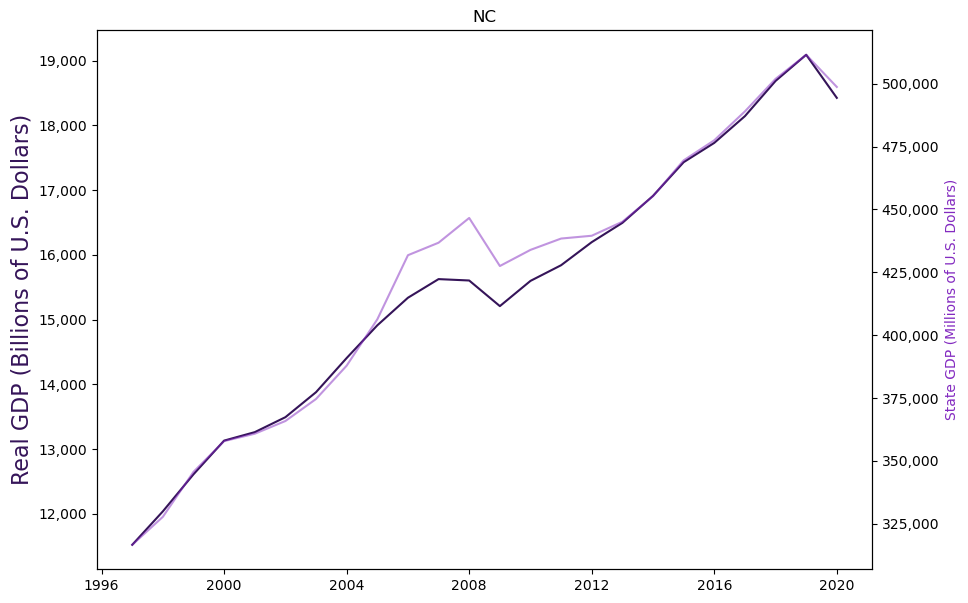

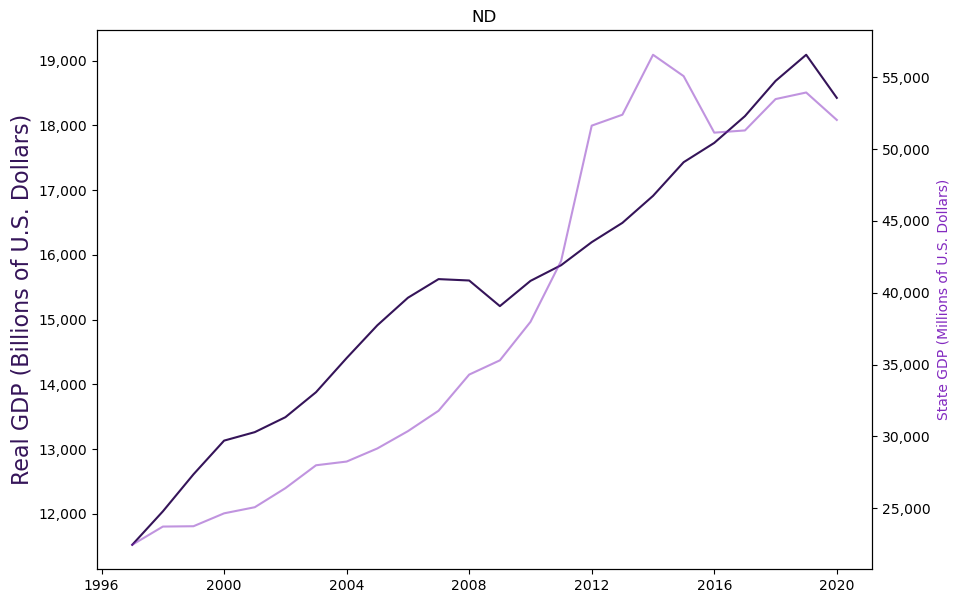

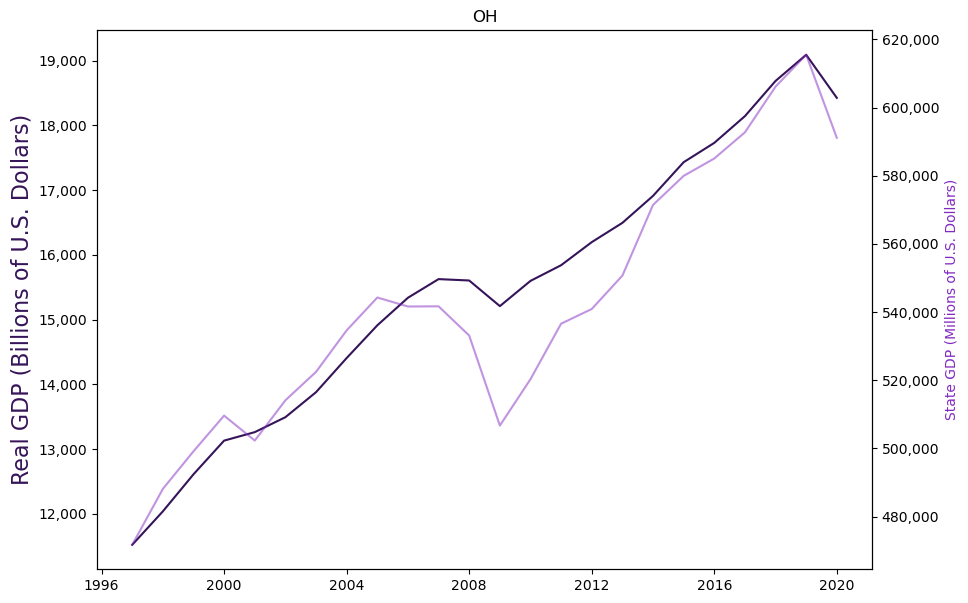

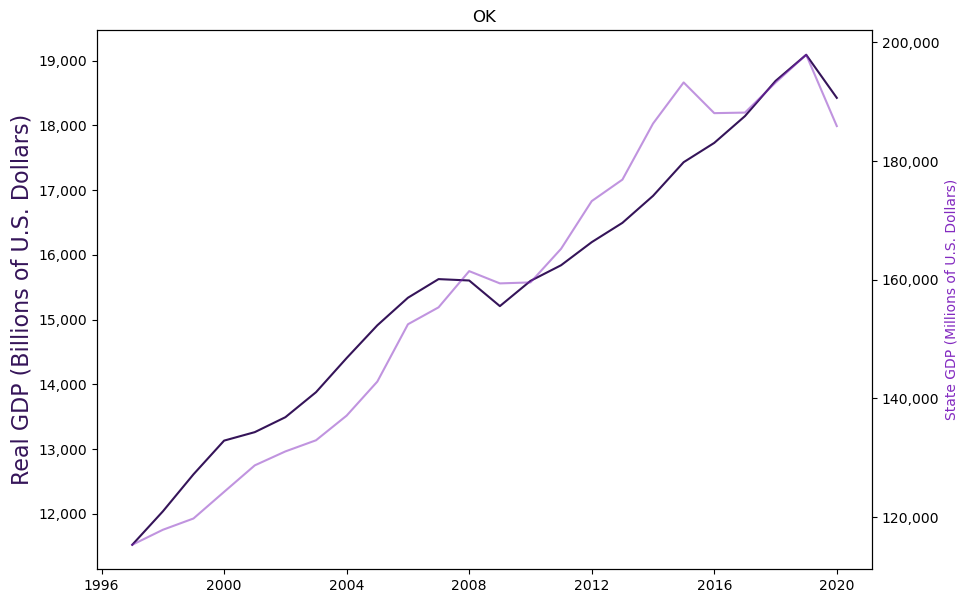

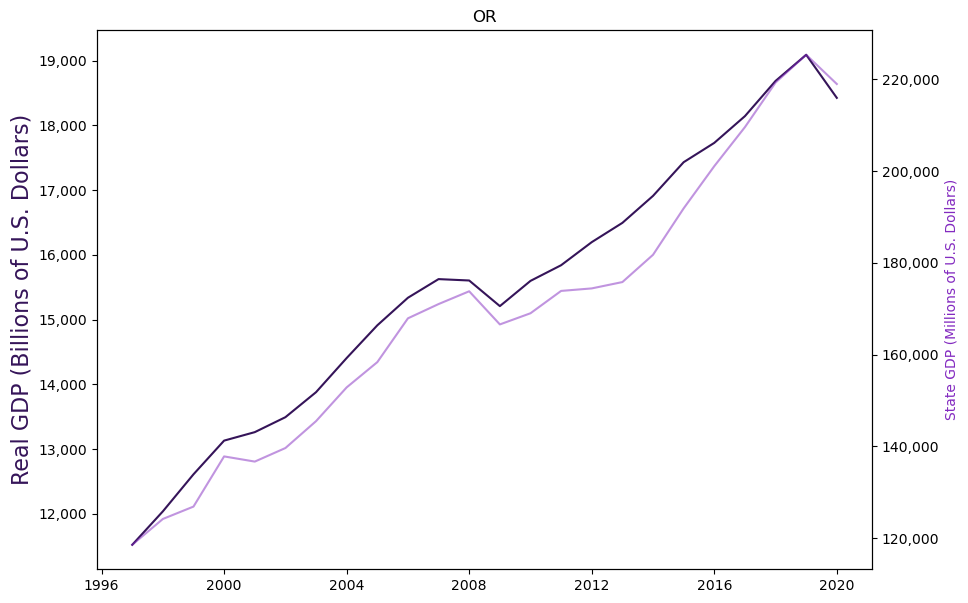

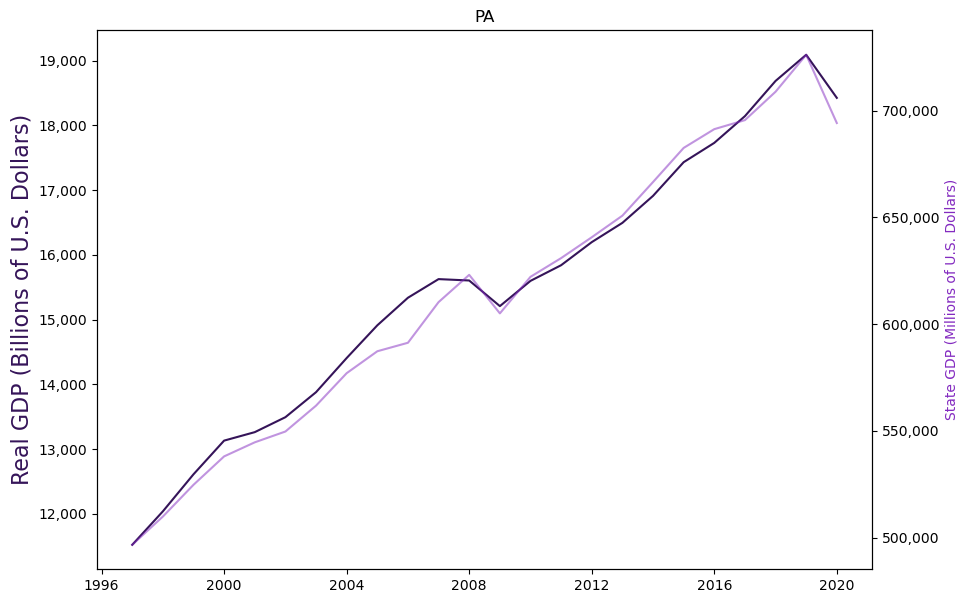

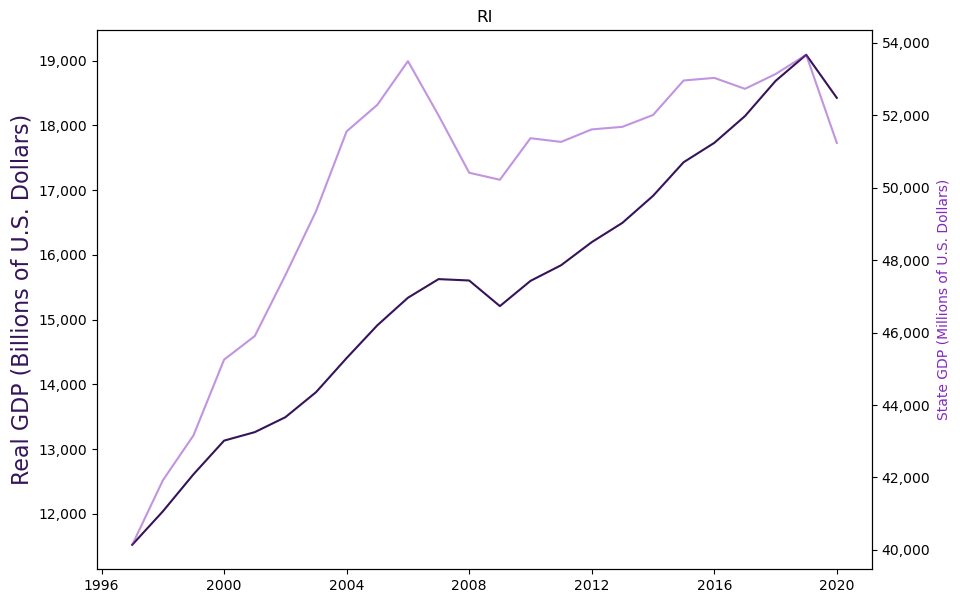

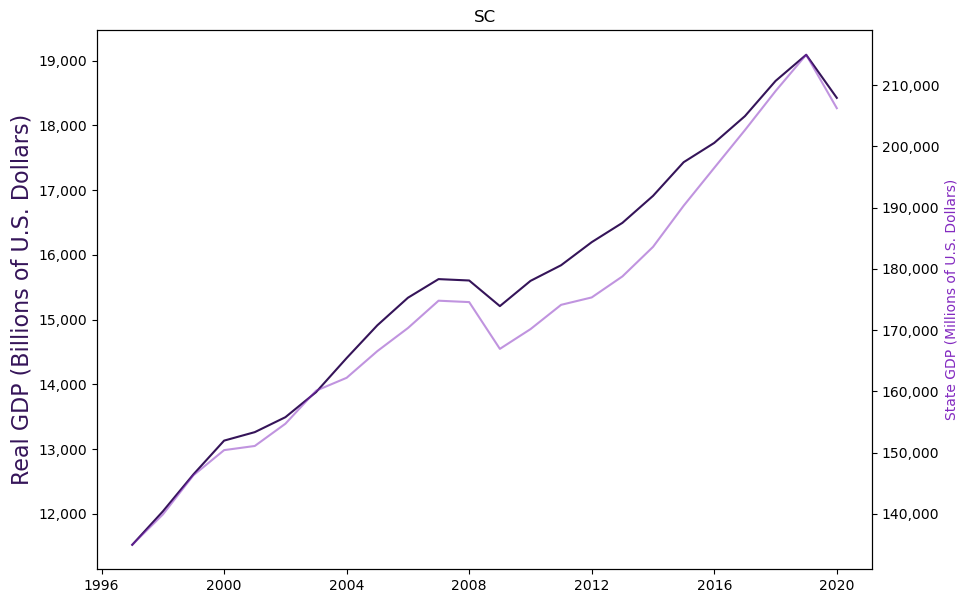

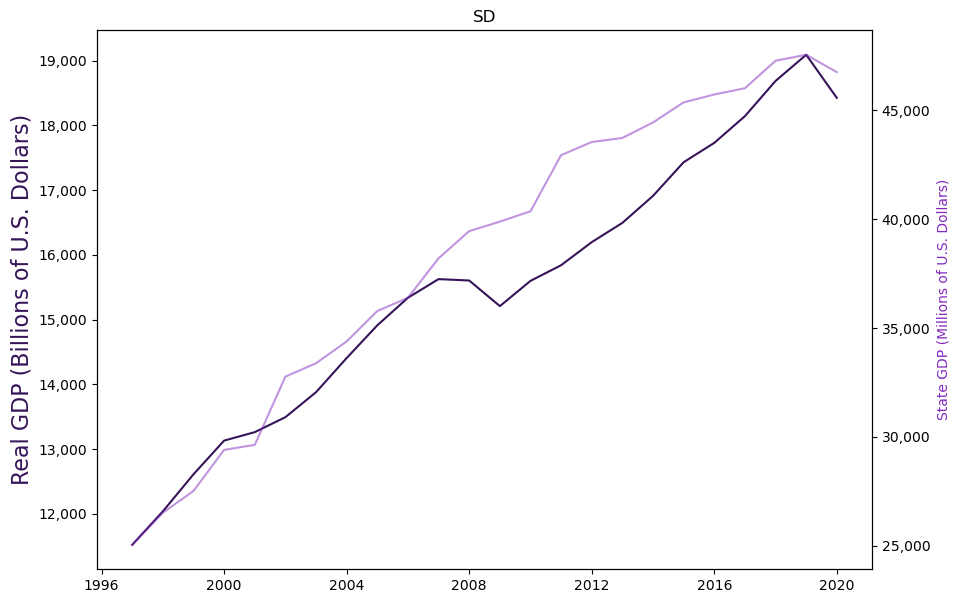

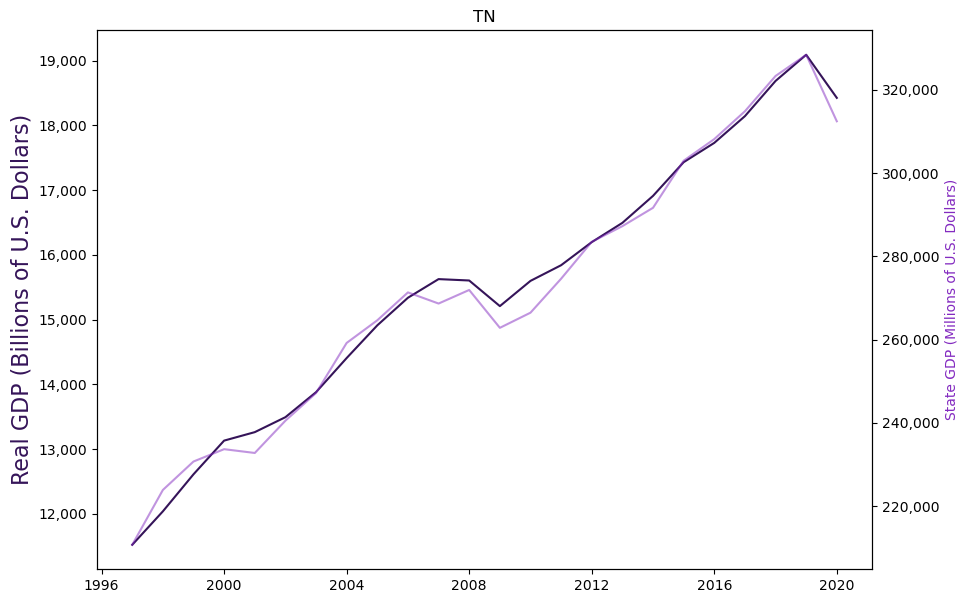

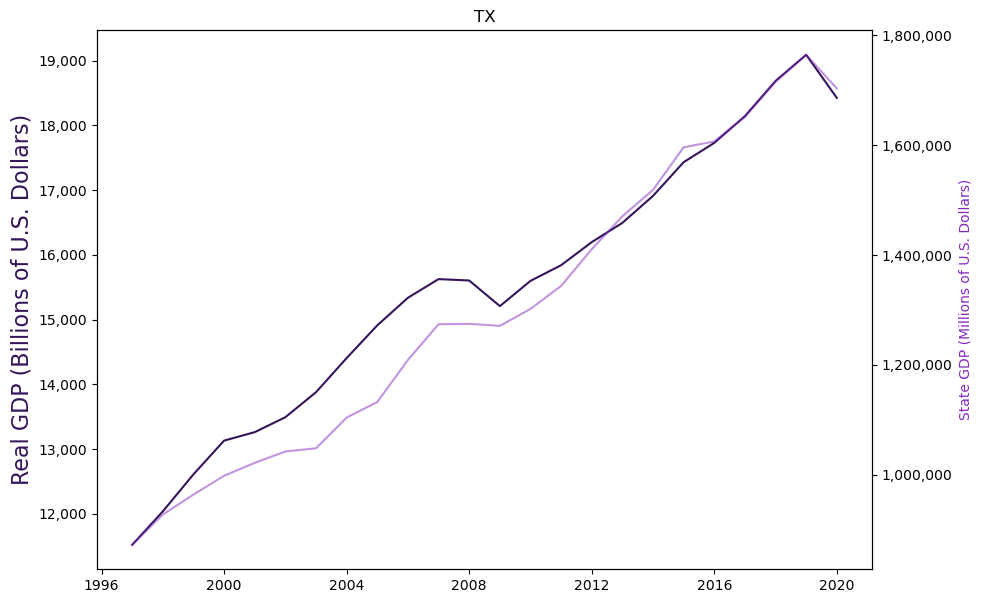

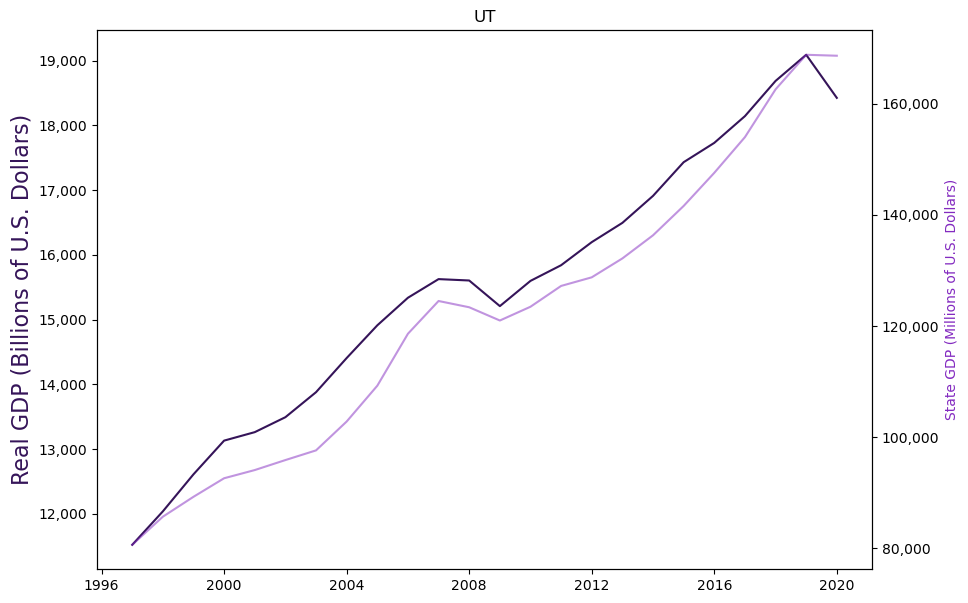

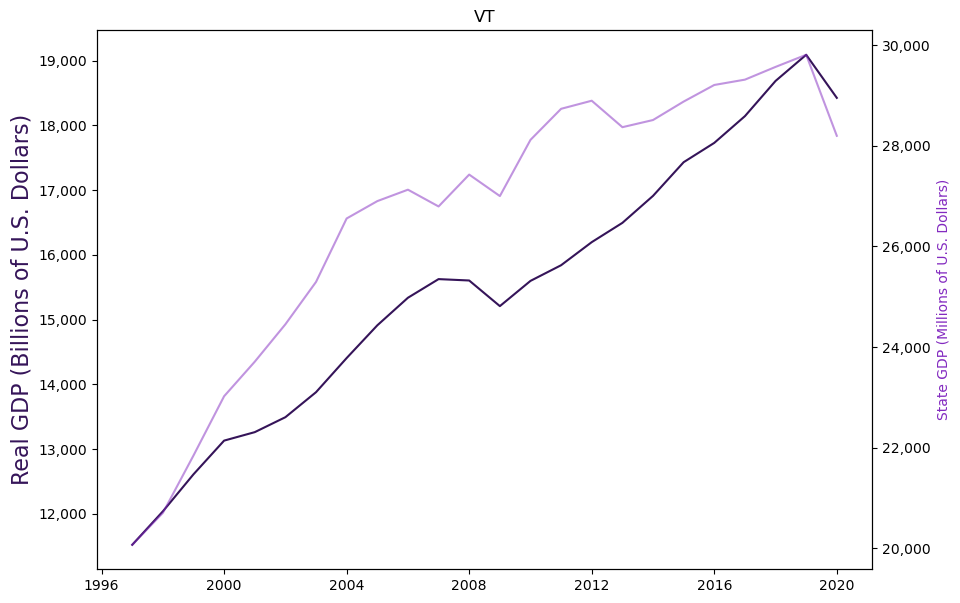

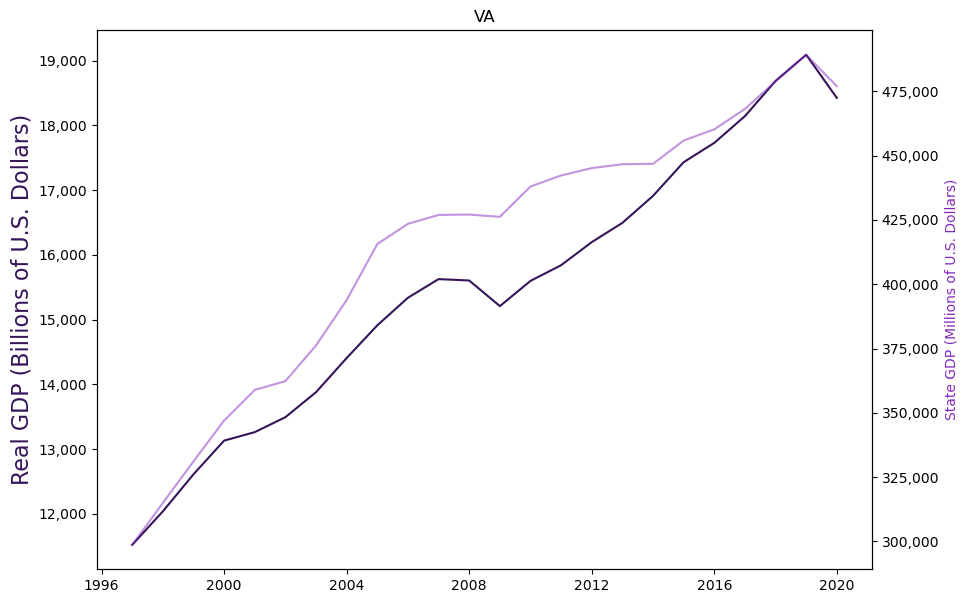

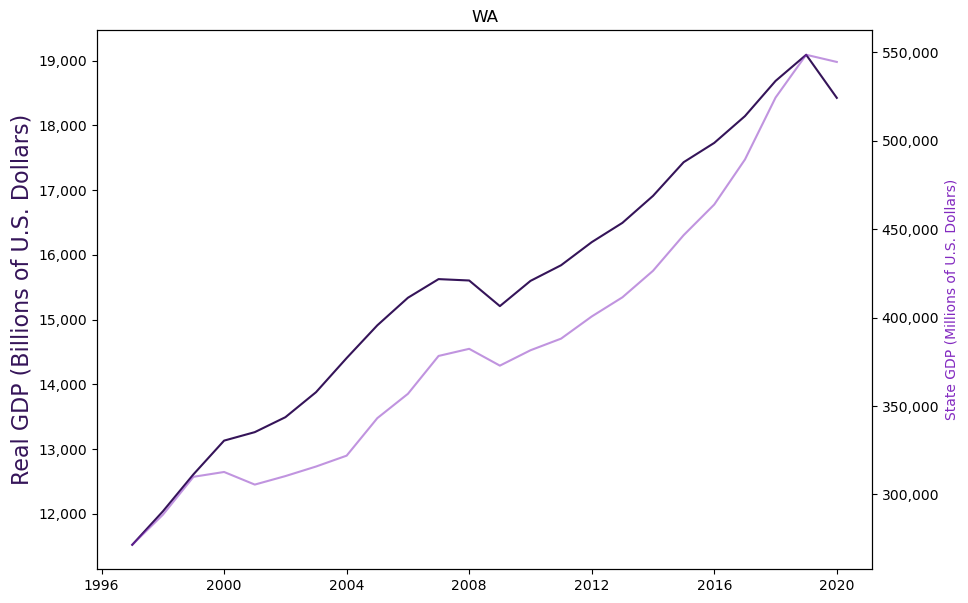

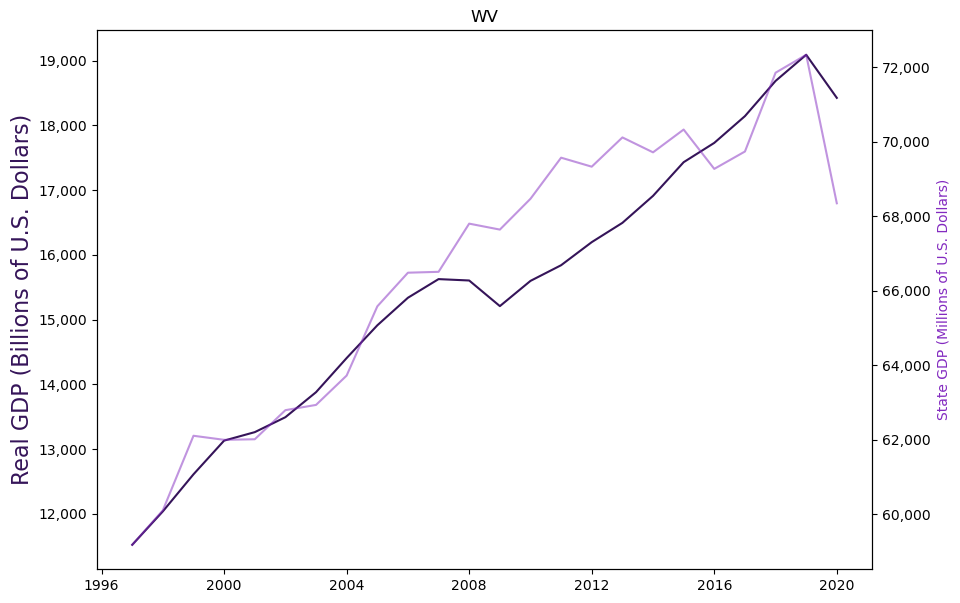

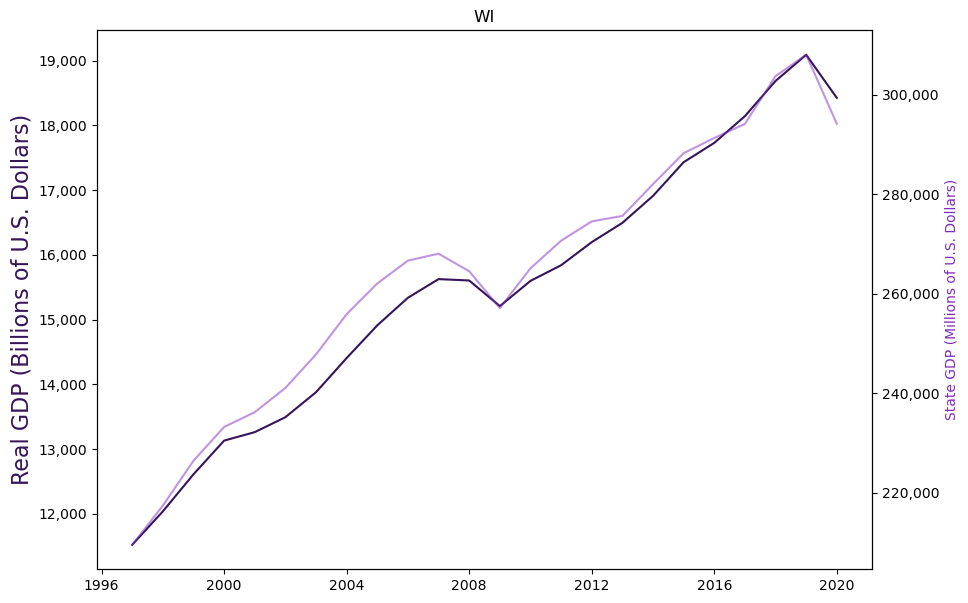

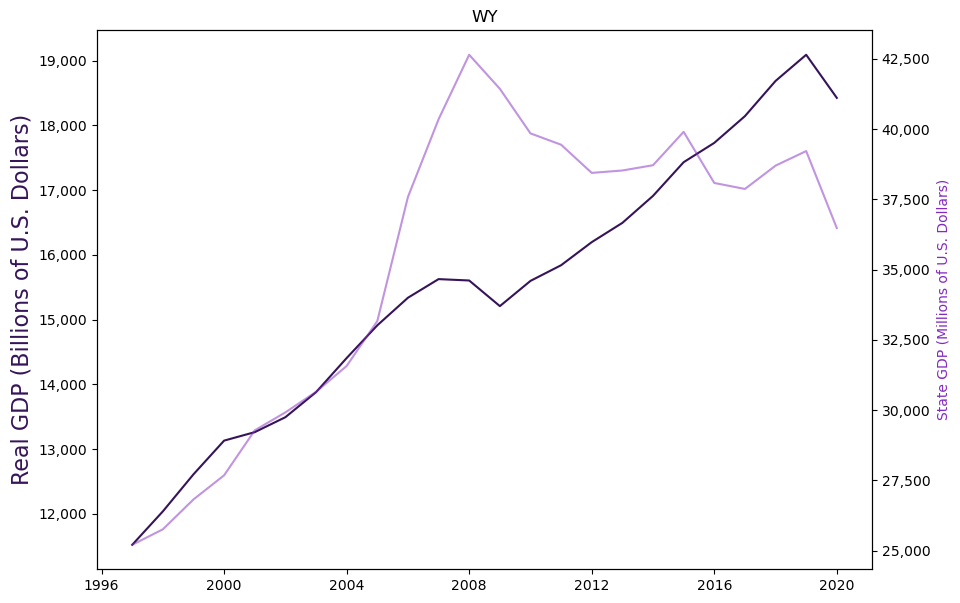

In [30]:
pp = PdfPages('GDP_state_level.pdf')
columns = ddd
line_labels =["National GDP", states]
for state in states:
    matplot.rc_file_defaults()
    ax1 = sns.set_style(style=None, rc=None )
    fig, ax1 = plt.subplots(figsize=(10,7))
    sns.lineplot(data=GDP_filter1['value'], color="#351459", ax=ax1)
    ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #plt.ylim(0,.07)
    ax1.set_ylabel('Real GDP (Billions of U.S. Dollars)', fontsize=16, color="#351459")
    ax2 = ax1.twinx()
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    sns.lineplot(data=ddd[state], alpha=0.5, color='#832ac0', ax=ax2)
    plt.xlabel('date')
    plt.ylabel('State GDP (Millions of U.S. Dollars)',color='#832ac0')
    plt.title(state)
    pp.savefig()

    

In [31]:
pp.close()